# ★ Random Numbers And Applications ★

In [150]:
# Import modules
import numpy as np
import scipy
import sympy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 9.1 Random Numbers

A linear congruential generator (**LCG**) has form

$$
\begin{align*}
x_i &= ax_{i-1} + b\ (mod\ m) \\
u_i &= \frac{x_i}{m}
\end
{align*}
$$

for **multiplier** a, **offset** b, and **modulus** m

In [206]:
def linear_congruential_generator(x, a, b, m):
    x = (a * x + b) % m
    u = x / m
    return u, x, a, b, m

In [32]:
x0 = 3
args = (x0, 13, 0, 31)
for i in range(10):
    u, *args = linear_congruential_generator(*args)
    print('idx_%02d x:%02d, u:%.4f' %(i + 1, args[0], u))

idx_01 x:08, u:0.2581
idx_02 x:11, u:0.3548
idx_03 x:19, u:0.6129
idx_04 x:30, u:0.9677
idx_05 x:18, u:0.5806
idx_06 x:17, u:0.5484
idx_07 x:04, u:0.1290
idx_08 x:21, u:0.6774
idx_09 x:25, u:0.8065
idx_10 x:15, u:0.4839


### Example

Monte Carlo Type 1 problem (reduced to a function average)

Approximate the area under the curve $y = x^2 \ in \ [0,\ 1]$

---


Evaluate $\frac{1}{b-a}\int_{a}^{b}f(x)dx$

In [79]:
x = sympy.symbols('x')
exact_value = sympy.integrate(x ** 2, (x, 0, 1))

In [100]:
# Arguments for our LCG
x0 = 3
args = (x0, 13, 0, 31)

# Function and arguments for the curve y = x^2
f = lambda x : pow(x, 2)

# Process for this example
def process(f, args, total_iterations):
    avg = 0
    for i in range(total_iterations):
        u, *args = linear_congruential_generator(*args)
        avg += f(u)
    avg /= total_iterations
    return avg

print('exact value = %s (%.6f in numerical representations)' %(exact_value, exact_value.evalf()))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 10), 10, abs(process(f, args, 10) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 20), 20, abs(process(f, args, 20) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 30), 30, abs(process(f, args, 30) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 40), 40, abs(process(f, args, 40) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 50), 50, abs(process(f, args, 50) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 60), 60, abs(process(f, args, 60) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 70), 70, abs(process(f, args, 70) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 80), 80, abs(process(f, args, 80) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 90), 90, abs(process(f, args, 90) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 100), 100, abs(process(f, args, 100) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 1000), 1000, abs(process(f, args, 1000) - exact_value.evalf())))

exact value = 1/3 (0.333333 in numerical representations)
average = 0.350260 with  10 uniform random numbers, error = 0.016927
average = 0.350156 with  20 uniform random numbers, error = 0.016823
average = 0.327957 with  30 uniform random numbers, error = 0.005376
average = 0.333533 with  40 uniform random numbers, error = 0.000199
average = 0.336837 with  50 uniform random numbers, error = 0.003503
average = 0.327957 with  60 uniform random numbers, error = 0.005376
average = 0.331143 with  70 uniform random numbers, error = 0.002190
average = 0.333507 with  80 uniform random numbers, error = 0.000173
average = 0.327957 with  90 uniform random numbers, error = 0.005376
average = 0.330187 with 100 uniform random numbers, error = 0.003146
average = 0.328180 with 1000 uniform random numbers, error = 0.005153


## Minimal standard random number generator

$$
\begin{align*}
x_i &= ax_{i-1} + b\ (mod\ m) \\
u_i &= \frac{x_i}{m}
\end
{align*}
$$

where $ m = 2^{31} - 1 (Mersenne\ prime),\ a = 7^5 = 16807,\ and\ b = 0$

In [250]:
def stdrand(x):
    return linear_congruential_generator(x, pow(2, 31) - 1, 0, pow(7, 5))[:2]

### Example

Once again, approximate the area under the curve $y = x^2 \ in \ [0,\ 1]$

In [99]:
# Arguments for our LCG
x0 = 3
args = (x0, pow(7, 5), 0, pow(2, 31) - 1)

# Function and arguments for the curve y = x^2
f = lambda x : pow(x, 2)

# Process for this example
def process(f, args, total_iterations):
    avg = 0
    for i in range(total_iterations):
        u, *args = linear_congruential_generator(*args)
        avg += f(u)
    avg /= total_iterations
    return avg

print('exact value = %s (%.6f in numerical representations)' %(exact_value, exact_value.evalf()))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 10), 10, abs(process(f, args, 10) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 20), 20, abs(process(f, args, 20) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 30), 30, abs(process(f, args, 30) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 40), 40, abs(process(f, args, 40) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 50), 50, abs(process(f, args, 50) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 60), 60, abs(process(f, args, 60) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 70), 70, abs(process(f, args, 70) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 80), 80, abs(process(f, args, 80) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 90), 90, abs(process(f, args, 90) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 100), 100, abs(process(f, args, 100) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 200), 200, abs(process(f, args, 200) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 300), 300, abs(process(f, args, 300) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 2000), 2000, abs(process(f, args, 2000) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 10000), 10000, abs(process(f, args, 10000) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 100000), 100000, abs(process(f, args, 100000) - exact_value.evalf())))

exact value = 1/3 (0.333333 in numerical representations)
average = 0.182694 with  10 uniform random numbers, error = 0.150640
average = 0.142560 with  20 uniform random numbers, error = 0.190773
average = 0.194451 with  30 uniform random numbers, error = 0.138882
average = 0.248453 with  40 uniform random numbers, error = 0.084881
average = 0.288673 with  50 uniform random numbers, error = 0.044660
average = 0.290157 with  60 uniform random numbers, error = 0.043176
average = 0.314652 with  70 uniform random numbers, error = 0.018682
average = 0.311511 with  80 uniform random numbers, error = 0.021822
average = 0.310805 with  90 uniform random numbers, error = 0.022528
average = 0.315324 with 100 uniform random numbers, error = 0.018009
average = 0.327481 with 200 uniform random numbers, error = 0.005852
average = 0.320882 with 300 uniform random numbers, error = 0.012451
average = 0.323561 with 2000 uniform random numbers, error = 0.009772
average = 0.335431 with 10000 uniform random

### Example

Monte Carlo Type 2 problem

Find the area of the set of points (x,y) that satisfy

$$
4(2x - 1)^4 + 8(2y - 1)^8 < 1 + 2(2y - 1)^3(3x - 2)^2
$$

In [137]:
# restrict : 0 <= (x, y) <= 1
# Arguments
x0 = 3
args = (x0, pow(7, 5), 0, pow(2, 31) - 1)
f = lambda x, y : 4 * pow(2 * x - 1, 4) + 8 * pow(2 * y - 1, 8) < 1 + 2 * pow(2 * y - 1, 3) * pow(3 * x - 2, 2)

# Process for this example
def process(f, args, total_iterations):
    hits = 0
    for i in range(total_iterations):
        ux, *args = linear_congruential_generator(*args)
        uy, *args = linear_congruential_generator(*args)
        hits += f(ux, uy)
    area = hits / total_iterations
    return area

print('area = %.6f with %3d uniform random numbers' %(process(f, args, 300000), 300000))

area = 0.547223 with 300000 uniform random numbers


For its visualization (from https://www.desmos.com/calculator)

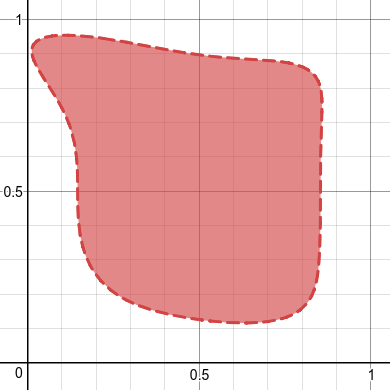

## The randu generator (infamous for its dependent random number sequence, proof is skipped)

$$
\begin{align*}
x_i &= ax_{i-1}\ (mod\ m) \\
u_i &= \frac{x_i}{m}
\end
{align*}
$$

where $a = 65539 = 2^{16} + 3\ and\ m = 2^{31}$

In [208]:
def randu(x):
    return linear_congruential_generator(x, pow(2, 16) + 3, 0, pow(2, 31))[:2]

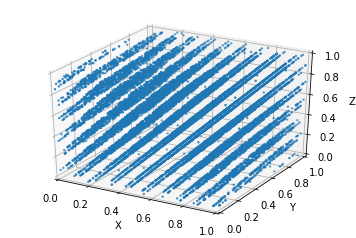

In [287]:
import time

# For matplotlib
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Arguments for randu
datax = np.array([])
datay = np.array([])
dataz = np.array([])
x = time.time()
total_iterations = 20000

# Process
for i in range(total_iterations):
    u1, x = randu(x)
    u2, x = randu(x)
    u3, x = randu(x)
    datax = np.append(datax, u1)
    datay = np.append(datay, u2)
    dataz = np.append(dataz, u3)

ax.scatter(datax, datay, dataz, zdir='y', s=2)

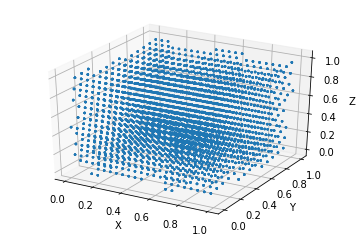

In [289]:
# For matplotlib
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Arguments for randu
datax = np.array([])
datay = np.array([])
dataz = np.array([])
x = time.time()
total_iterations = 20000

# Process
for i in range(total_iterations):
    u1, x = stdrand(x)
    u2, x = stdrand(x)
    u3, x = stdrand(x)
    datax = np.append(datax, u1)
    datay = np.append(datay, u2)
    dataz = np.append(dataz, u3)

ax.scatter(datax, datay, dataz, zdir='y', s=2)